In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df = customer_df.drop('customer', axis=1)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
numerical_df = customer_df.select_dtypes(np.number)
categorical_df = customer_df.select_dtypes('object')
display(numerical_df.head(), categorical_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


state


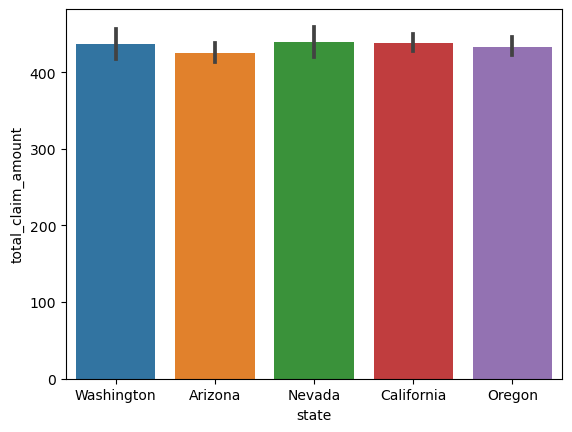

response


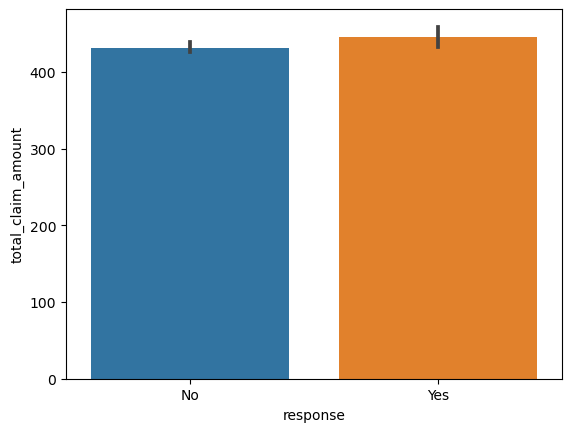

coverage


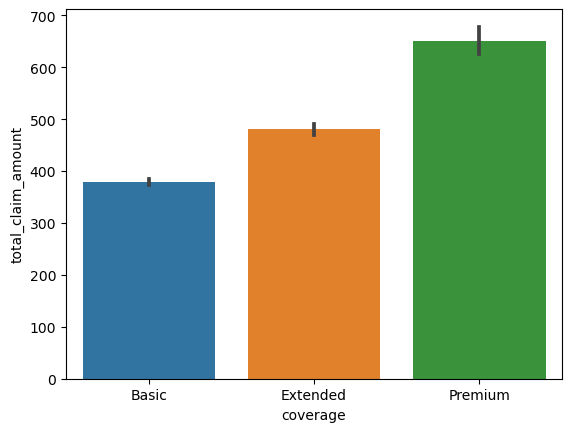

education


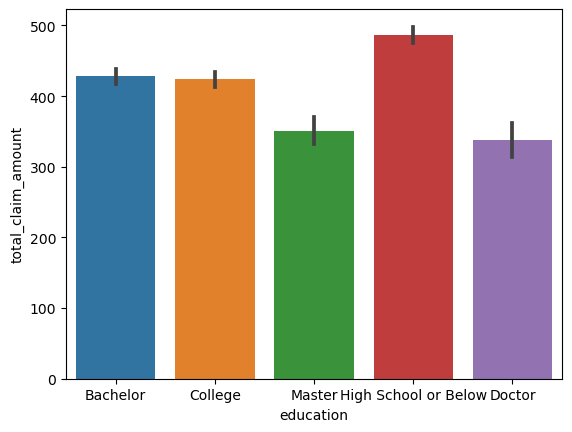

effective_to_date


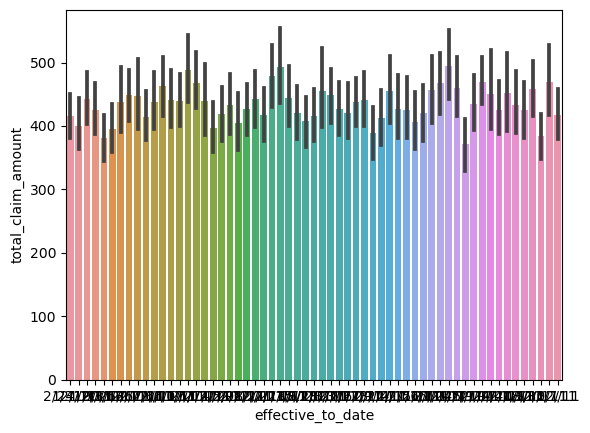

employmentstatus


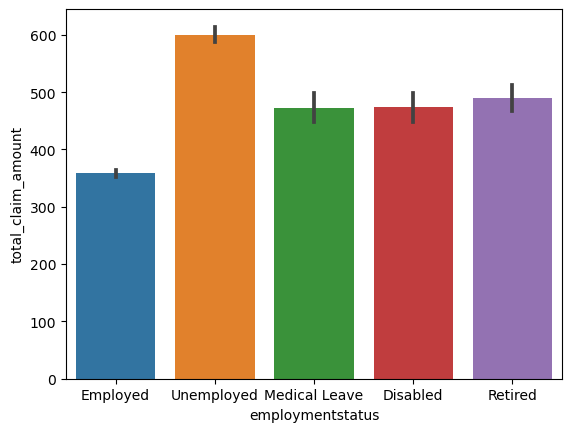

gender


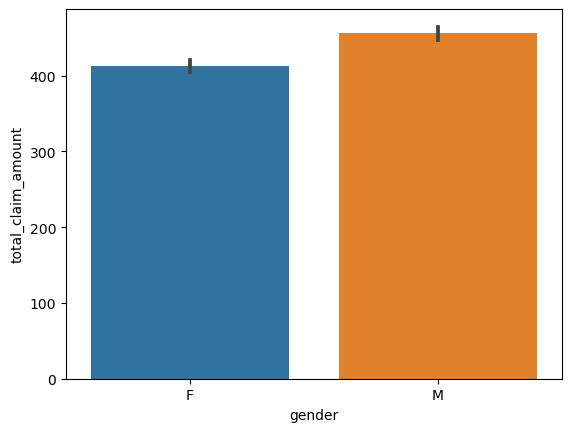

location_code


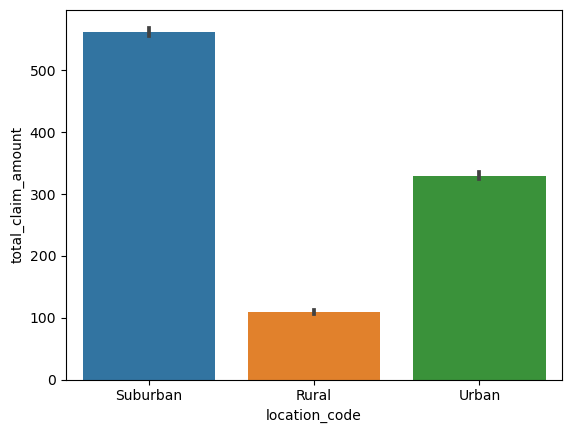

marital_status


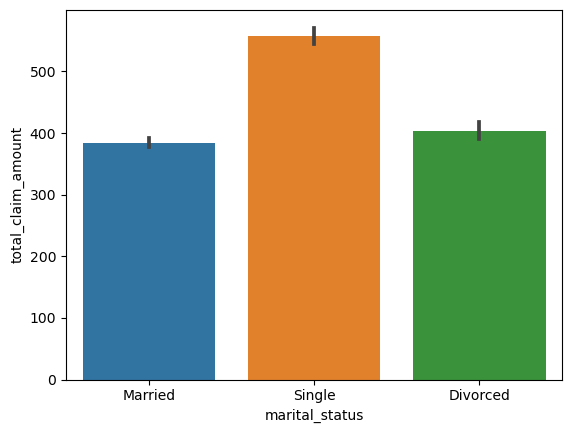

policy_type


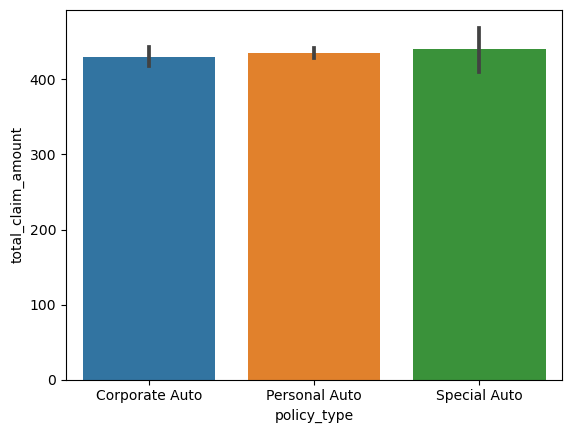

policy


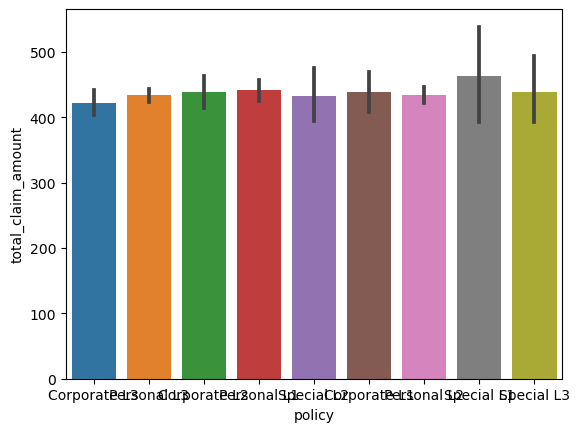

renew_offer_type


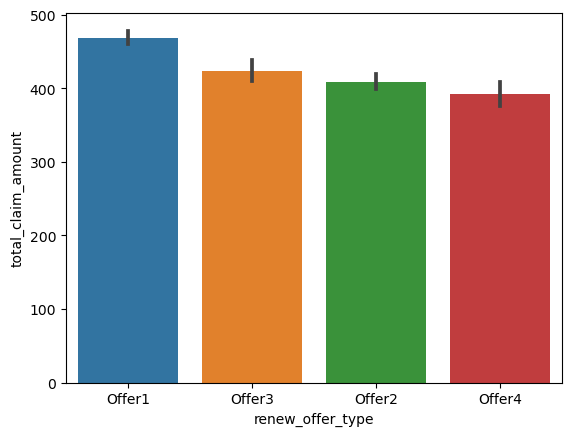

sales_channel


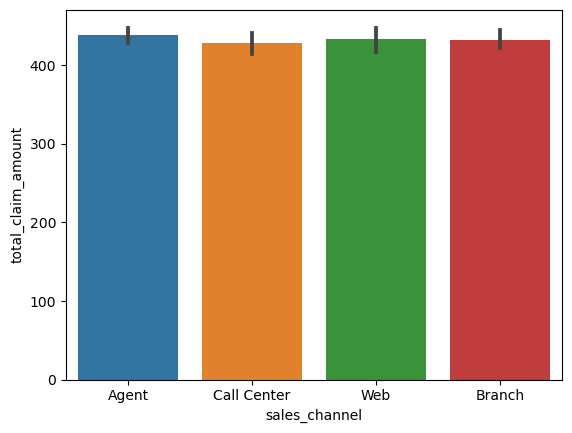

vehicle_class


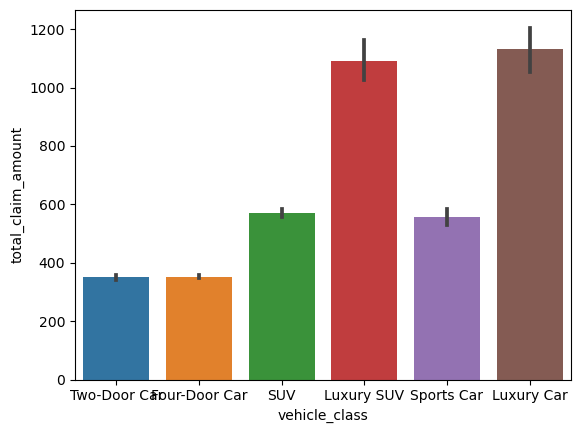

vehicle_size


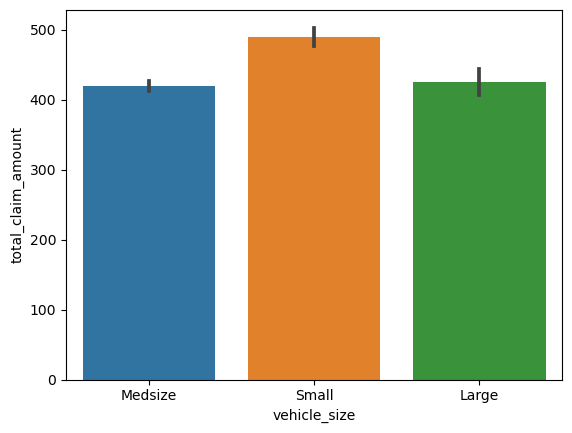

In [5]:
for col in categorical_df:
    print(col)
    sns.barplot(data=customer_df, x=col, y='total_claim_amount')
    plt.show()

In [6]:
for col in categorical_df:
    print(customer_df[col].value_counts())
    print()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     1

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [8]:
customer_df['policy'] = customer_df['policy'].str[-2:]
customer_df['policy'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

## 1. Categoricals

In [10]:
categoricals = customer_df.select_dtypes(object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize


## 2. Plot categoricals

state


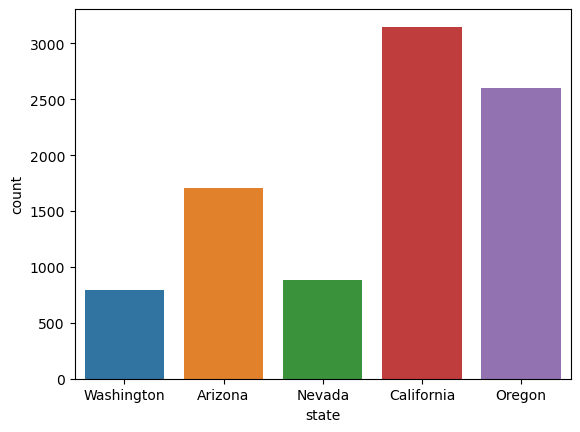

response


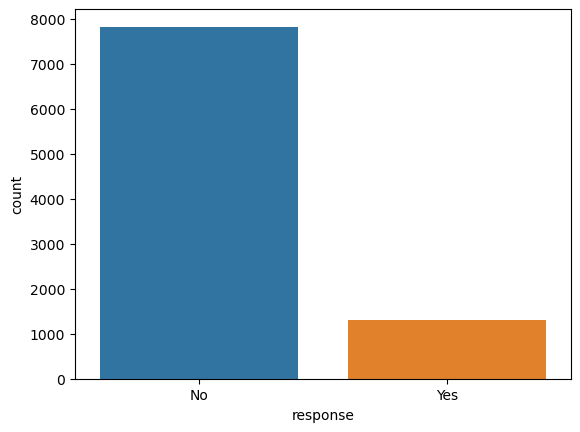

coverage


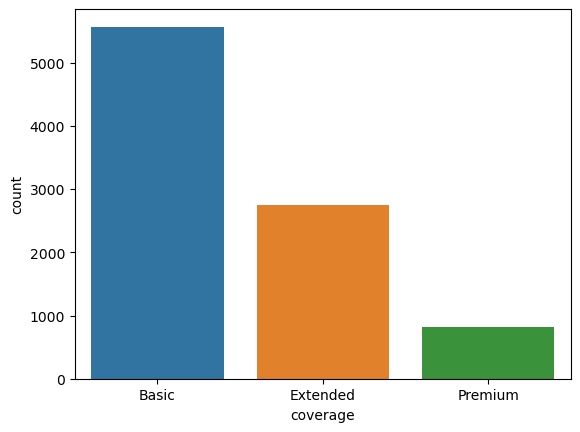

education


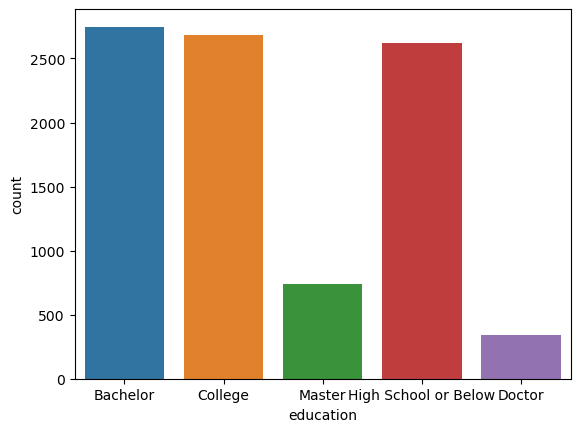

employmentstatus


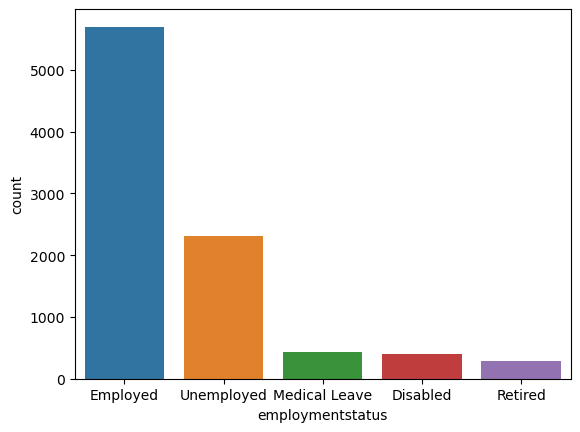

gender


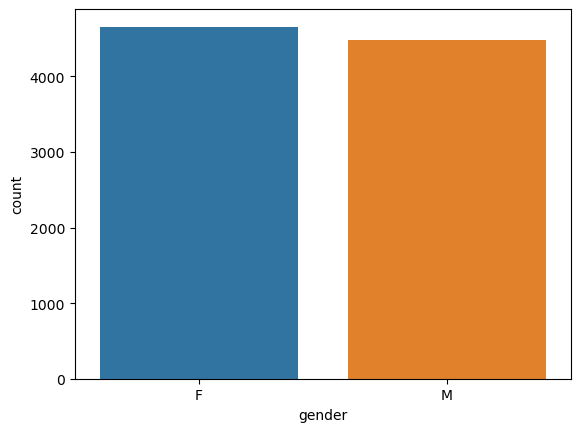

location_code


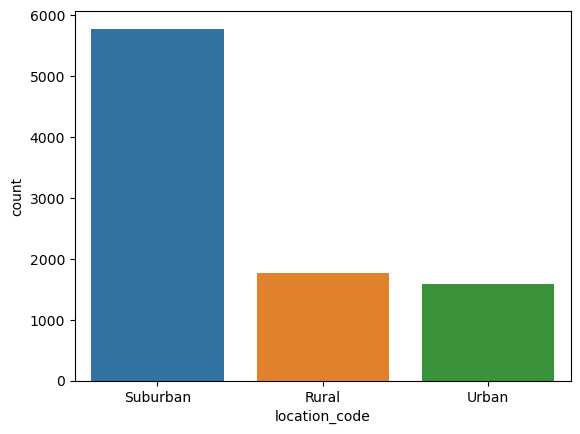

marital_status


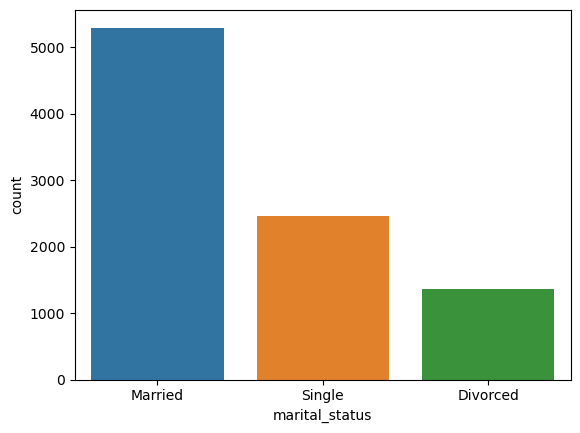

policy_type


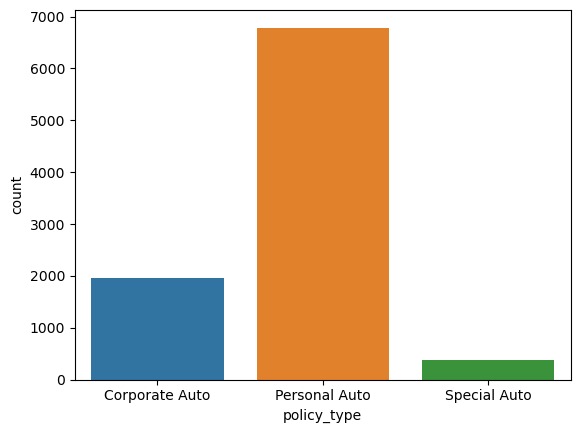

policy


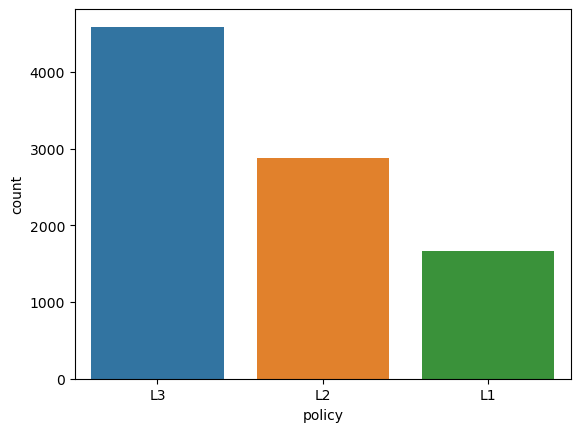

renew_offer_type


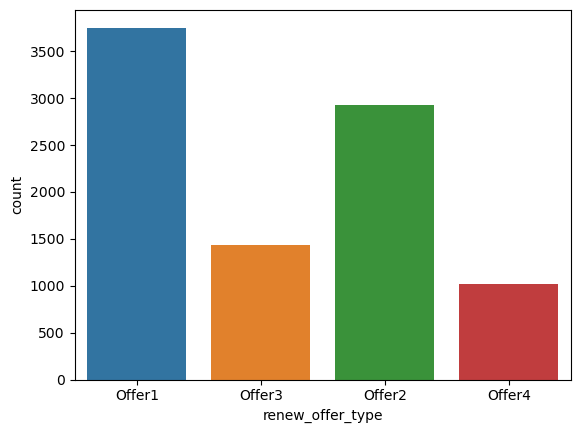

sales_channel


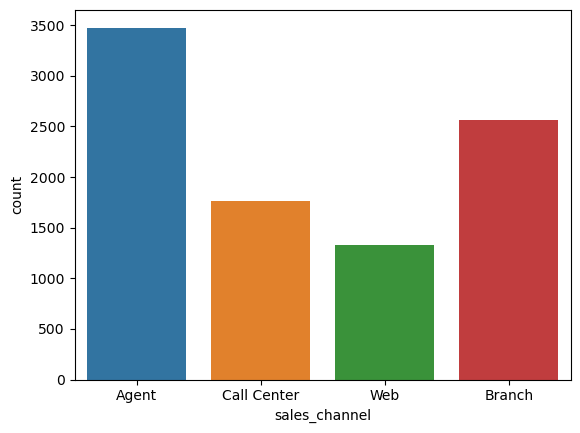

vehicle_class


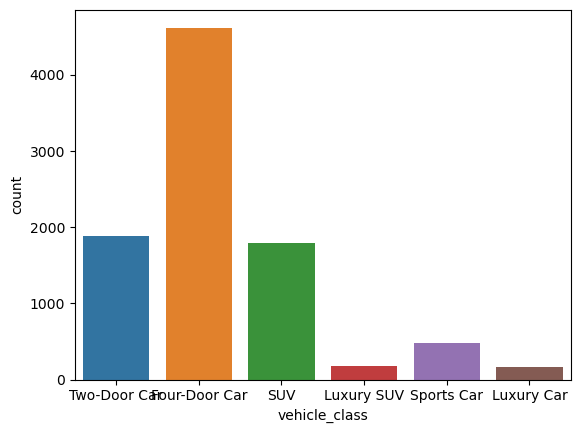

vehicle_size


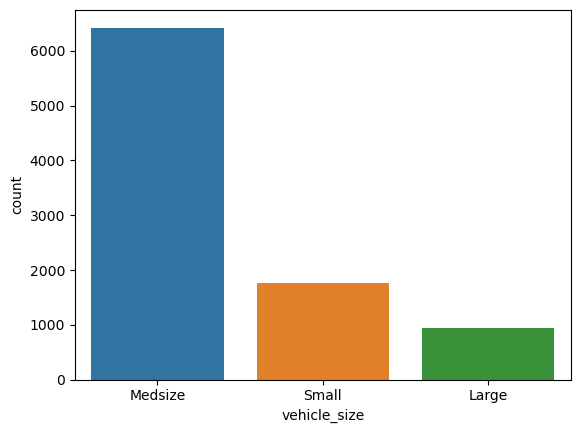

In [11]:
for col in categoricals:
    print(col)
    sns.countplot(data=customer_df, x=col)
    plt.show()

state


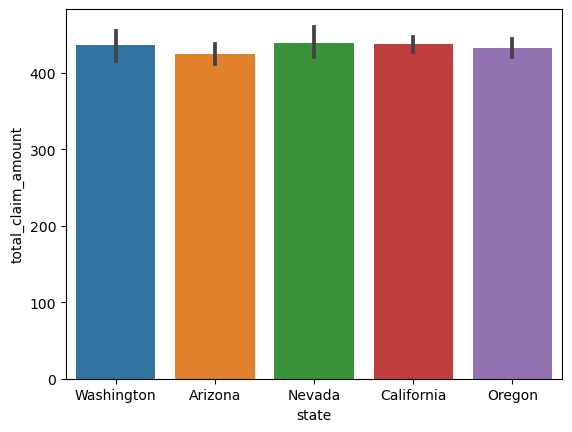

response


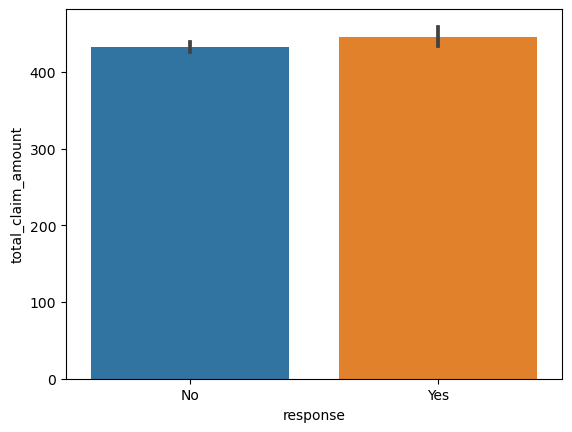

coverage


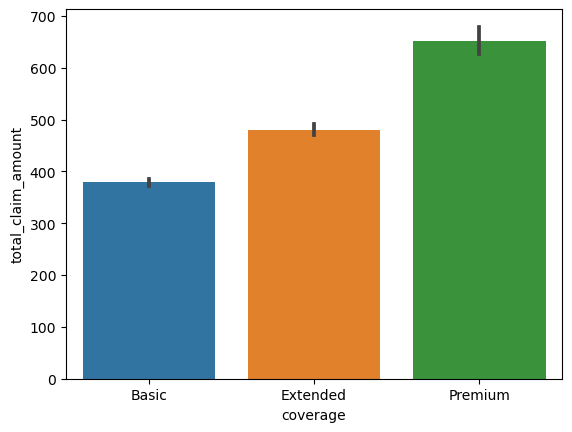

education


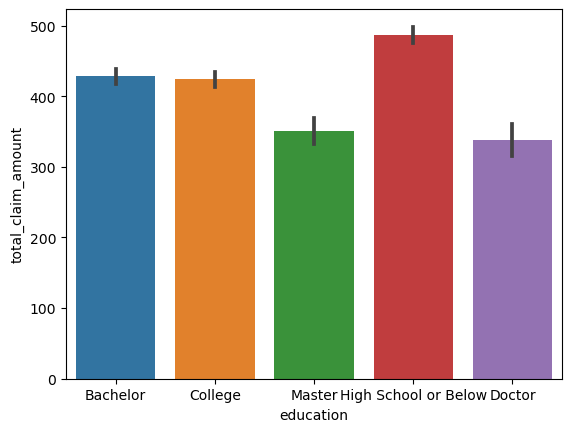

employmentstatus


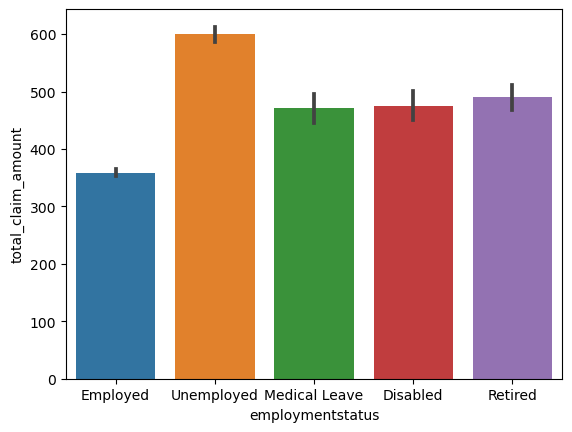

gender


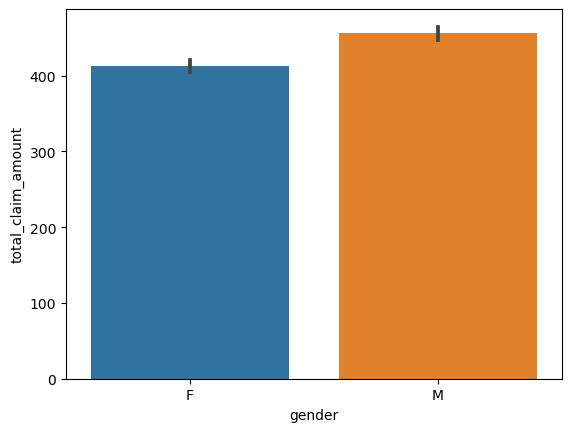

location_code


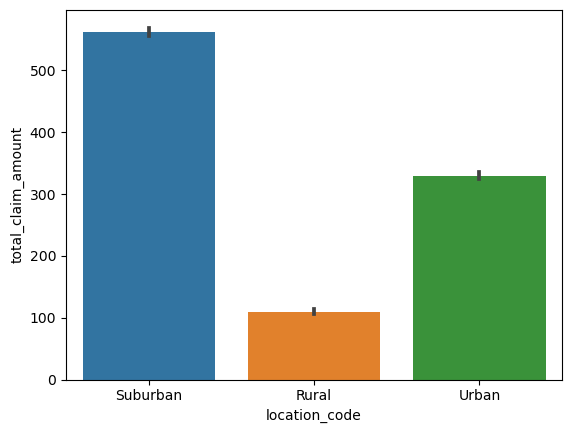

marital_status


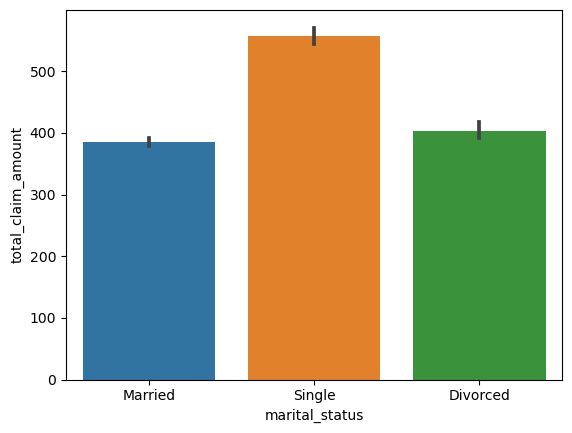

policy_type


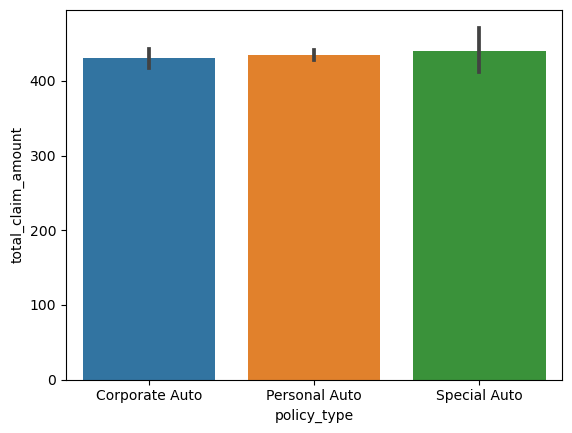

policy


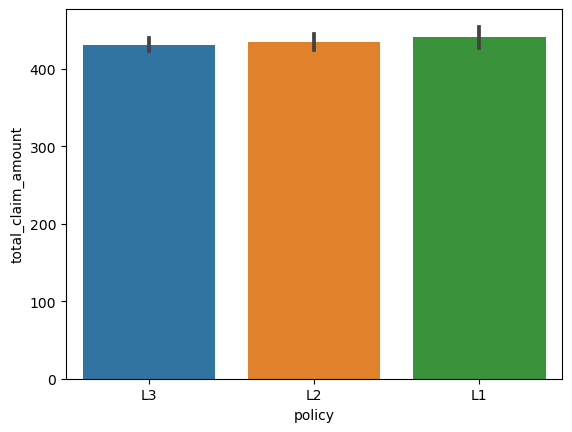

renew_offer_type


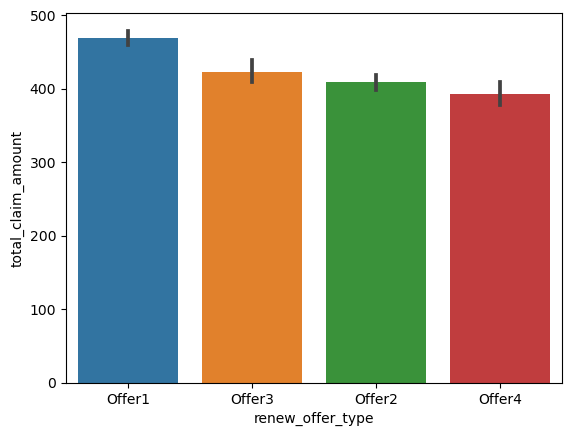

sales_channel


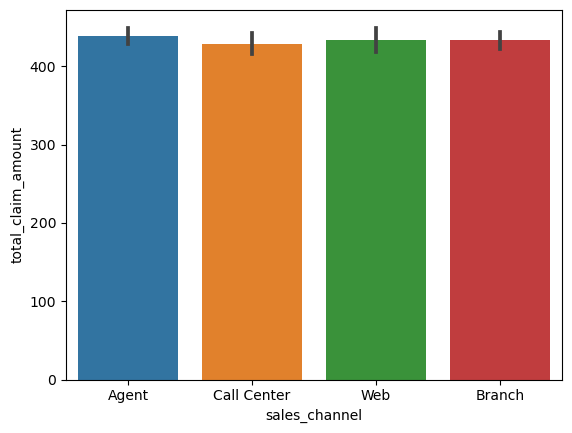

vehicle_class


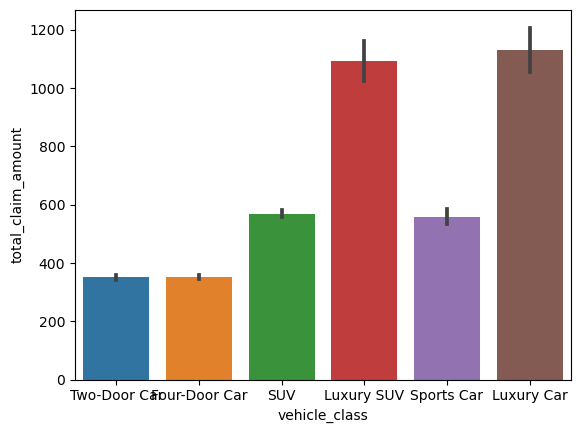

vehicle_size


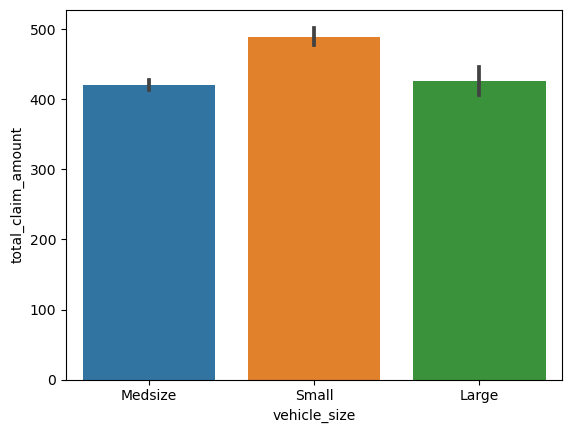

In [12]:
for col in categoricals:
    print(col)
    sns.barplot(data=customer_df, x=col, y='total_claim_amount')
    plt.show()

### Insights:
#### 'coverage':
* Customers on a Premium plan claim more.
#### 'education':
* Tendency to claim more from customers the less their education level, with HS or below at a larger average and MS/PHDs at lower averages.
#### 'employmentstatus':
* Employed customers claim less and umemployed more.
#### 'location_code':
* Large tendency towards bigger claim amounts in suburban areas, and opposite in rural areas
#### 'renew_offer_type':
* Larger claim amounts from Offer1 to Offer4, in order.
#### 'renew_offer_type':
* Larger claim amounts from the two types of luxury vehicles, and smaller from 2 and 4 doors.
#### 'renew_offer_type':
* slighly larger claim amounts from smaller cars.
#### all other columns:
* Evenly distributed or very close to.

## 3. Drop irrelevant columns

In [16]:
customer_df = customer_df.drop(['response','policy_type','policy','sales_channel'],axis=1)
customer_df.head()

,state,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Offer1,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Offer3,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Offer1,566.472247,Two-Door Car,Medsize
3,California,7645.861827,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Offer1,529.881344,SUV,Medsize
4,Washington,2813.692575,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Offer1,138.130879,Four-Door Car,Medsize


## 4. Plot 'effective_to_date'

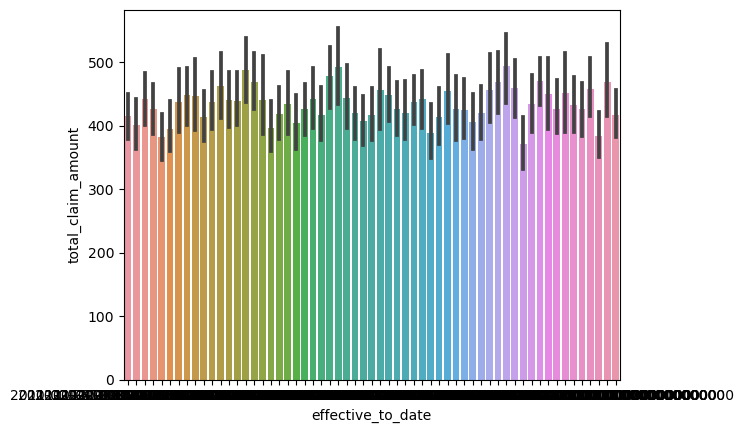

In [13]:
sns.barplot(data=customer_df, x='effective_to_date', y='total_claim_amount')
plt.show()

### We can extract day week and month from 'effective_to_date'